<a href="https://colab.research.google.com/github/brempong21/Credit-Card-Anomaly-Detection/blob/main/NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_data_validation

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(style = 'whitegrid')
import matplotlib
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv

In [3]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
for col in df.columns:
  if df.isna().sum().any():
    df[col].fillna(df[col].mean(), inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.shape

(284807, 31)

Text(0, 0.5, 'Frequency')

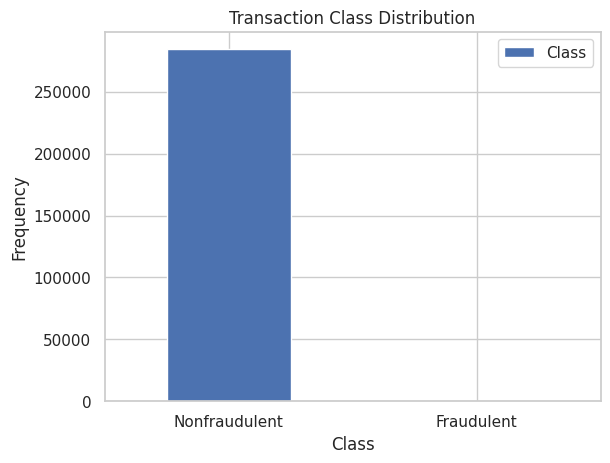

In [9]:
LABELS = ["Nonfraudulent", "Fraudulent"]

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")
plt.legend()
plt.ylabel("Frequency")

In [10]:
fraudulent = df[df['Class']==1]

nonfraudulent = df[df['Class']==0]

print(f'fraudulent{fraudulent.shape}  nonfraudulent{nonfraudulent.shape}')

fraudulent(492, 31)  nonfraudulent(284315, 31)


In [11]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
nonfraudulent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

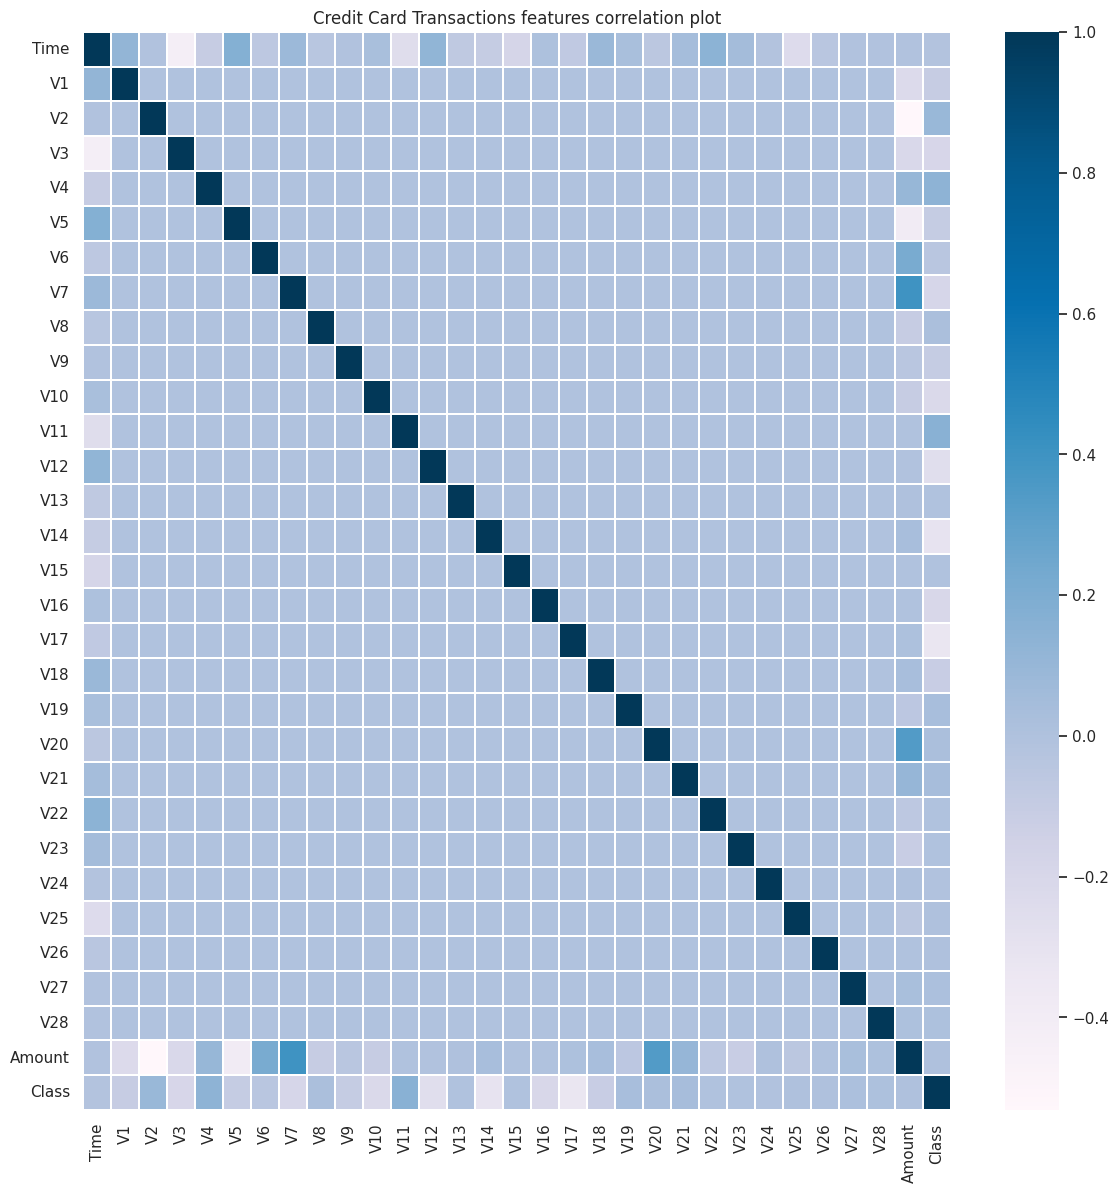

In [13]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap=plt.cm.PuBu)
plt.show()

In [14]:
X = df.drop(['Class'], axis = 1)
y = df['Class'].astype(int)

print(f"X.shape: {X.shape}")
print(f"Y shape: {y.shape}")

X.shape: (284807, 30)
Y shape: (284807,)


In [15]:
train_df, eval_df = train_test_split(df, test_size=0.3, shuffle=True, random_state=123)

print(f"train shape: {train_df.shape}")
print(f"eval shape: {eval_df.shape}")

train shape: (199364, 31)
eval shape: (85443, 31)


In [16]:
train_df_stats = tfdv.generate_statistics_from_dataframe(train_df)
tfdv.visualize_statistics(train_df_stats)

In [17]:
schema = tfdv.infer_schema(statistics = train_df_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Time',FLOAT,required,,-
'V1',FLOAT,required,,-
'V2',FLOAT,required,,-
'V3',FLOAT,required,,-
'V4',FLOAT,required,,-
'V5',FLOAT,required,,-
'V6',FLOAT,required,,-
'V7',FLOAT,required,,-
'V8',FLOAT,required,,-


In [18]:
print(f"Number of features in schema: {len(schema.feature)}")

Number of features in schema: 32


In [19]:
eval_df_stats = tfdv.generate_statistics_from_dataframe(eval_df)
tfdv.visualize_statistics(lhs_statistics=eval_df_stats, rhs_statistics=train_df_stats,
                          lhs_name = 'EVAL DATASET',
                          rhs_name = ' TRAIN DATASET')

In [20]:
anomalies = tfdv.validate_statistics(statistics=eval_df_stats, schema=schema)
tfdv.display_anomalies(anomalies)

In [21]:
def fit_model(X,y):
  model = RandomForestClassifier(criterion = 'entropy', random_state=47)
  model.fit(X,y)
  return model

In [22]:
def calculate_metrics(model, X_test_scaled, y_test):
  y_pred = model.predict(X_test_scaled)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return acc, prec, f1

In [23]:
def train_and_get_metrics(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state = 123)

  scaler = StandardScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  model = fit_model(X_train_scaled, y_train)

  plt.figure(figsize=(10, 12))
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.sort_values(ascending=False).plot(kind='barh')
  plt.show()

  acc, prec, f1 = calculate_metrics(model, X_test_scaled, y_test)

  return acc, prec, f1

In [24]:
def evaluate_model_on_features(X,y):
  acc, prec, f1 = train_and_get_metrics(X,y)
  display_df = pd.DataFrame([[acc, prec, f1, X.shape[1]]], columns=["Accuracy", "Precision",  "F1 Score", 'Feature Count'])
  return display_df

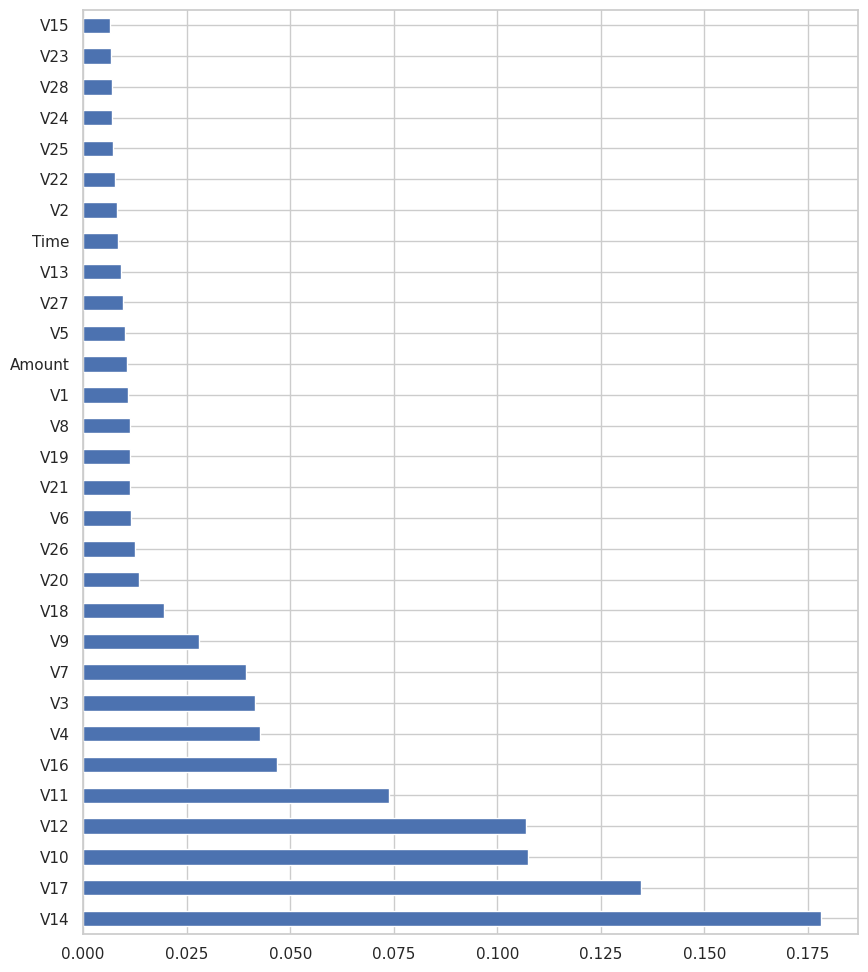

,Accuracy,Precision,F1 Score,Feature Count
All features,0.999602,0.977273,0.883562,30


In [25]:
all_features_eval_df = evaluate_model_on_features(X, y)
all_features_eval_df.index = ['All features']

results = all_features_eval_df

results.head()

<ipython-input-26-3ed51530a812>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()]


['V10', 'V12', 'V14', 'V17']


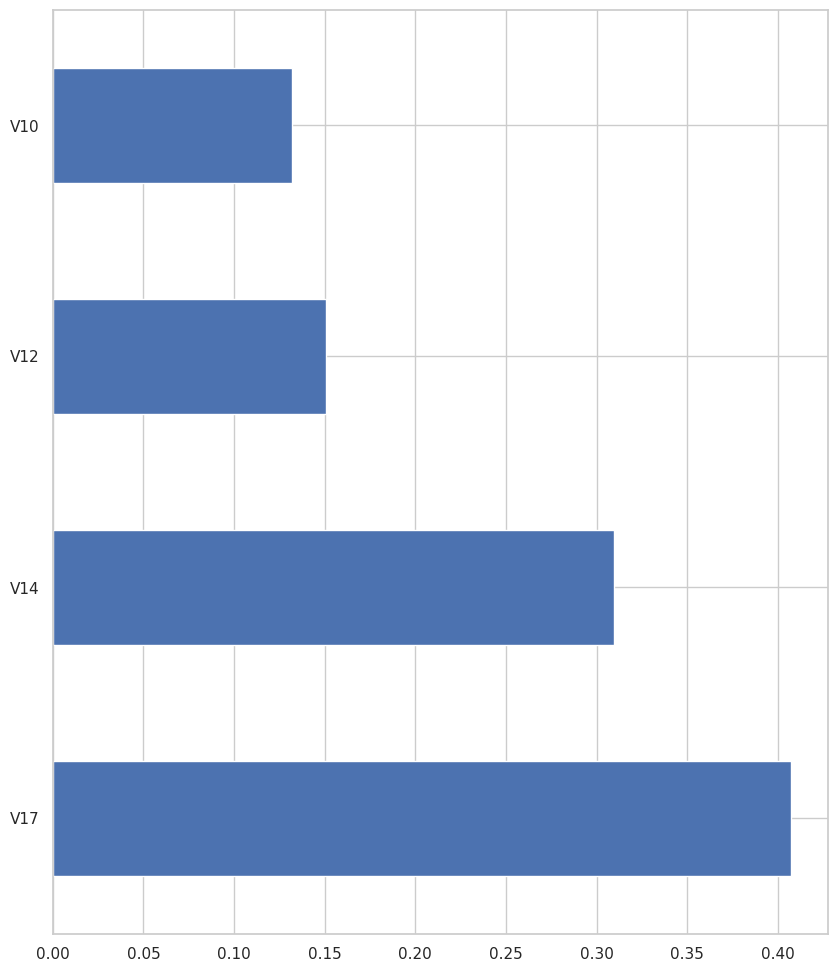

<ipython-input-26-3ed51530a812>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(strong_features_eval_df)


,Accuracy,Precision,F1 Score,Feature Count
All features,0.999602,0.977273,0.883562,30
Correlation features,0.999462,0.907143,0.846667,4


In [26]:
cor_target = abs(corr["Class"])

relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.iteritems()]

names.remove('Class')

print(names)

strong_features_eval_df = evaluate_model_on_features(df[names], y)
strong_features_eval_df.index = ['Correlation features']

results = results.append(strong_features_eval_df)
results.head()

In [27]:
def univariate_selection():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    selector = SelectKBest(f_classif, k=20)

    X_new = selector.fit_transform(X_train_scaled, Y_train)

    feature_idx = selector.get_support()
    for name, included in zip(df.drop("Class",1 ).columns, feature_idx):
        print("%s: %s" % (name, included))

    feature_names = df.drop("Class",1 ).columns[feature_idx]

    return feature_names

In [28]:
univariate_feature_names = univariate_selection()

<ipython-input-27-303f696ae770>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for name, included in zip(df.drop("Class",1 ).columns, feature_idx):


Time: False
V1: True
V2: True
V3: True
V4: True
V5: True
V6: True
V7: True
V8: True
V9: True
V10: True
V11: True
V12: True
V13: False
V14: True
V15: False
V16: True
V17: True
V18: True
V19: True
V20: True
V21: True
V22: False
V23: False
V24: False
V25: False
V26: False
V27: True
V28: False
Amount: False


<ipython-input-27-303f696ae770>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = df.drop("Class",1 ).columns[feature_idx]


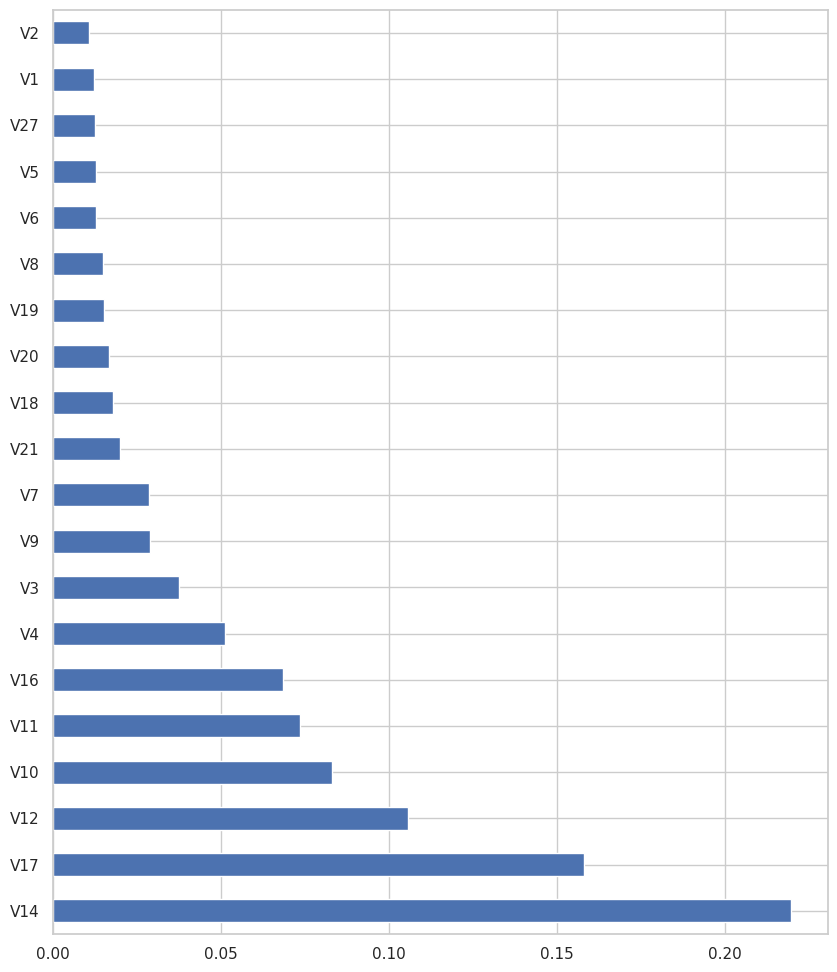

<ipython-input-29-a8fff8fb69e2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(univariate_eval_df)


,Accuracy,Precision,F1 Score,Feature Count
All features,0.999602,0.977273,0.883562,30
Correlation features,0.999462,0.907143,0.846667,4
KBest,0.999567,0.955556,0.874576,20


In [29]:
univariate_eval_df = evaluate_model_on_features(df[univariate_feature_names], y)
univariate_eval_df.index = ['KBest']

results = results.append(univariate_eval_df)
results.head(n=10)